CAPSTONE PROJECT:
-----------------
PROBLEM DETAILS:
----------------
ANALYZE AND CREATE PREDICTIVE MODELS FOR FUEL ECONOMY OF CARS.
TESTING IS DONE AT LABORATORY BY MANUFACTURERS WITH OVERSIGHT BY EPA.
ANALYSIS ON DATA FROM 2008-2018 USING EPA GREEN VEHICLE GUIDE - DATAFILE3

PROBLEM1 :-
- NO OF SAMPLES IN EACH YEAR
- NO OF COLUMNS IN EACH DATASET
- DUPLICATE ROWS IN EACH DATASET
- DATATYES OF COLUMNS
- FEATURES WITH MISSING VALUES
- NO OF NON-NULL UNIQUE VALUES FOR FEATURES IN EACH DATASET
- UNIQUE VALUES AND THEIR COUNT
- ANALYSIS BY GROUPING FEATURES

PROBLEM2 :-
DRAW CONCLUSIONS BY VISUAL TO EXPLAIN CHANGE IN CARS IN SPAN OF 10 YEARS
- ARE UNIQUE MODELS USING ALTERNATIVE FUELS IN 2018 COMPARED TO OTHER YEARS,BY HOW MUCH
- HOW MUCH DID VEHICLES IMPROVED IN FUEL ECONOMY(INCREASED IN MPG) PER YEAR
- CHARACTERISTICS OF SMARTWAY VEHICLES,HAVE THEY CHANGED OVER TIME.(MPG,GREENHOUSE GAS)
- WHAT FEATURES ARE ASSOCIATED WITH BETTER FUEL ECONOMY(MPG)

PROBLEM3 :-
- MERGE DATASET WITH SAME COLUMN NAMES (YEAR) AND DROP EXTRA COLUMNS(NOTE: DATATYPE OF MERGED COLUMNS ARE SAME)
- CREATE PREDICTIVE MODEL TO PREDICT WHETHER A VEHICLE IS "SMARTWAY" VEHICLE OR NOT USING CLASSIFICATION ALGORITHM (LOGISTIC AND DECISION). CONCLUDE WHICH IS BEST AND WHY NOT OTHER 


DATA SOURCE:  https://www.fueleconomy.gov/feg/download.shtml
DATA DESC  :  https://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/all_alpha_09.xls
/kaggle/input/all_alpha_14.xlsx
/kaggle/input/all_alpha_17.xlsx
/kaggle/input/all_alpha_11.xlsx
/kaggle/input/all_alpha_18.xlsx
/kaggle/input/all_alpha_12.xlsx
/kaggle/input/all_alpha_13.xlsx
/kaggle/input/all_alpha_16.xlsx
/kaggle/input/all_alpha_10.xls
/kaggle/input/all_alpha_08.xls
/kaggle/input/all_alpha_15.xlsx


IMPORT LIBRARIES

In [2]:
import os
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

IMPORT DATASET

In [3]:
epa08 = pd.read_excel(r"/kaggle/input/all_alpha_08.xls")
epa09 = pd.read_excel(r"/kaggle/input/all_alpha_09.xls")
epa10 = pd.read_excel(r"/kaggle/input/all_alpha_10.xls")
epa11 = pd.read_excel(r"/kaggle/input/all_alpha_11.xlsx")
epa12 = pd.read_excel(r"/kaggle/input/all_alpha_12.xlsx")
epa13 = pd.read_excel(r"/kaggle/input/all_alpha_13.xlsx")
epa14 = pd.read_excel(r"/kaggle/input/all_alpha_14.xlsx")
epa15 = pd.read_excel(r"/kaggle/input/all_alpha_15.xlsx")
epa16 = pd.read_excel(r"/kaggle/input/all_alpha_16.xlsx")
epa17 = pd.read_excel(r"/kaggle/input/all_alpha_17.xlsx")
epa18 = pd.read_excel(r"/kaggle/input/all_alpha_18.xlsx")
#epa18.head()
epa = [epa08,epa09,epa10,epa11,epa12,epa13,epa14,epa15,epa16,epa17,epa18]
years = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

NO OF SAMPLES IN EACH YEAR

In [4]:
for i in np.arange(11):
    print("Total samples in EPA Green Vehicle",years[i],"data is",len(epa[i]))

Total samples in EPA Green Vehicle 2008 data is 2404
Total samples in EPA Green Vehicle 2009 data is 2567
Total samples in EPA Green Vehicle 2010 data is 2342
Total samples in EPA Green Vehicle 2011 data is 2179
Total samples in EPA Green Vehicle 2012 data is 2262
Total samples in EPA Green Vehicle 2013 data is 2403
Total samples in EPA Green Vehicle 2014 data is 2543
Total samples in EPA Green Vehicle 2015 data is 2699
Total samples in EPA Green Vehicle 2016 data is 2595
Total samples in EPA Green Vehicle 2017 data is 2589
Total samples in EPA Green Vehicle 2018 data is 2713


NO OF COLUMNS IN EACH DATASET

In [5]:
for i in np.arange(11):
    print("-------EPA Green Vehicle",years[i]," data-----------")
    print("Number of columns :",len(epa[i].columns))
    print(epa[i].columns)

-------EPA Green Vehicle 2008  data-----------
Number of columns : 18
Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')
-------EPA Green Vehicle 2009  data-----------
Number of columns : 17
Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Stnd Description', 'Underhood ID', 'Veh Class', 'Air Pollution Score',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')
-------EPA Green Vehicle 2010  data-----------
Number of columns : 17
Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Stnd Description', 'Underhood ID', 'Veh Class', 'Air Pollution Score',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay'],
      dtype='ob

DUPLICATE ROWS IN EACH DATASET

In [6]:
for i in np.arange(11):
    print(epa[i].duplicated(keep='first').count())

2404
2567
2342
2179
2262
2403
2543
2699
2595
2589
2713


DATATYES OF COLUMNS

In [7]:
for i in np.arange(11):
    print("--Datatype of columns in EPA Green Vehicle",years[i]," data--")
    print(epa[i].dtypes)
    print("-------------------------------------------------")

--Datatype of columns in EPA Green Vehicle 2008  data--
Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object
-------------------------------------------------
--Datatype of columns in EPA Green Vehicle 2009  data--
Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                    

FEATURES WITH MISSING VALUES

In [8]:
for i in np.arange(11):
    print("--Missing Values in EPA Green Vehicle",years[i]," data--")
    print("Total rows in ",years[i],"data is",len(epa[i]))
    print(epa[i].isnull().sum())
    print("--------------------------------------------------") 

--Missing Values in EPA Green Vehicle 2008  data--
Total rows in  2008 data is 2404
Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64
--------------------------------------------------
--Missing Values in EPA Green Vehicle 2009  data--
Total rows in  2009 data is 2567
Model                     0
Displ                     0
Cyl                     198
Trans                     0
Drive                     0
Fuel                      0
Sales Area                0
Stnd                      0
Stnd Description          0
Underhood ID

NO OF NON-NULL UNIQUE VALUES FOR FEATURES IN EACH DATASET

In [9]:
for i in np.arange(11):
    print("--Non-Null Unique Values in EPA Green Vehicle",years[i]," data--")
    print("Total rows in ",years[i],"data is",len(epa[i]))
    print(epa[i].nunique())


--Non-Null Unique Values in EPA Green Vehicle 2008  data--
Total rows in  2008 data is 2404
Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64
--Non-Null Unique Values in EPA Green Vehicle 2009  data--
Total rows in  2009 data is 2567
Model                   476
Displ                    47
Cyl                       8
Trans                    19
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     10
Stnd Description         14
Underhood ID            363
Veh Class          

EXPLORATORY DATA ANALYSIS

In [10]:
#Drop "FE Calc Appr","Unadj Cmb MPG" Column from epa08 which is available only in 2008 data.
for i in range(0,1):
    epa[i] = epa[i].drop(['FE Calc Appr'], axis=1)
    epa[i] = epa[i].drop(['Unadj Cmb MPG'], axis=1)
    epa[i].head(1)

In [11]:
#Insert corresponding years as column into respective tables
for i in np.arange(11):
    (epa[i].insert(0,"Year",years[i]))

In [12]:
# Both Stnd and Stnd Description describes the same, Since Stnd Description is not available for 2008 we drop it for all years.
for i in range(1,11):
    epa[i] = (epa[i].drop(['Stnd Description'],axis=1))
    print(epa[i].head(1))

   Year      Model  Displ  Cyl    Trans Drive      Fuel Sales Area Stnd  \
0  2009  ACURA MDX    3.7  6.0  Auto-S5   4WD  Gasoline         CA   U2   

   Underhood ID Veh Class Air Pollution Score City MPG Hwy MPG Cmb MPG  \
0  9HNXT03.7H29       SUV                   7       15      20      17   

  Greenhouse Gas Score SmartWay  
0                    3       no  
   Year      Model  Displ  Cyl       Trans Drive      Fuel Sales Area Stnd  \
0  2010  ACURA MDX    3.7  6.0  SemiAuto-6   4WD  Gasoline         CA   U2   

   Underhood ID Veh Class Air Pollution Score City MPG Hwy MPG Cmb MPG  \
0  AHNXT03.7W19       SUV                   7       16      21      18   

  Greenhouse Gas Score SmartWay  
0                    4       no  
   Year      Model  Displ  Cyl       Trans Drive      Fuel Sales Area Stnd  \
0  2011  ACURA MDX    3.5  6.0  SemiAuto-6   4WD  Gasoline         CA   U2   

   Underhood ID Veh Class Air Pollution Score City MPG Hwy MPG Cmb MPG  \
0  BHNXT03.7M19       SUV  

In [13]:
#Replace Cert Region to Sales Area as column name in 2016,2017,2018
for i in range(8,11):
    epa[i] = (epa[i].rename(columns={"Cert Region":"Sales Area"}))
    print(epa[i].head(2))
#epa16.rename(columns={"Cert Region":"Sales Area"})
#epa17.rename(columns={"Cert Region":"Sales Area"})
#epa18.rename(columns={"Cert Region":"Sales Area"})

   Year      Model  Displ  Cyl      Trans Drive      Fuel Sales Area  \
0  2016  ACURA ILX    2.4  4.0  AutoMan-8   2WD  Gasoline         FA   
1  2016  ACURA ILX    2.4  4.0  AutoMan-8   2WD  Gasoline         CA   

        Stnd  Underhood ID  Veh Class Air Pollution Score City MPG Hwy MPG  \
0         B5  GHNXV02.4XH3  small car                   5       25      36   
1  L3ULEV125  GHNXV02.4XH3  small car                   6       25      36   

  Cmb MPG Greenhouse Gas Score SmartWay Comb CO2  
0      29                    7       No      305  
1      29                    7      Yes      305  
   Year      Model  Displ  Cyl  Trans Drive      Fuel Sales Area       Stnd  \
0  2017  ACURA ILX    2.4  4.0  AMS-8   2WD  Gasoline         CA  L3ULEV125   
1  2017  ACURA ILX    2.4  4.0  AMS-8   2WD  Gasoline         FA     T3B125   

   Underhood ID  Veh Class  Air Pollution Score City MPG Hwy MPG Cmb MPG  \
0  HHNXV02.4SH3  small car                    6       25      35      29   
1  HH

In [14]:
#Remove unnecessary (cyl) for "Cyl" column in year 2008
for j in range(0,1):
    epa[j]['Cyl'] = epa[j]['Cyl'].fillna(0.0)
    for i in range(0,len(epa[j]['Cyl'])):
        if (epa[j]['Cyl'][i] == 0):
            epa[j]['Cyl'][i] = 0.0
        else:
            epa[j]['Cyl'][i] = (float(re.match(r'.([0-9]+).*|',epa[j]['Cyl'][i]).group(1)))
#print(epa[j].head(3))


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
#Include "Comb CO2" from 2008 to 2013
for i in range(0,5):
    epa[i]['Comb CO2'] = np.nan

In [16]:
#Merge all year dataset into a single dataset
epa_list = []
for i in np.arange(11):
    epa_list.append(epa[i])
#print(epa_list)
epadata = pd.concat(epa_list, ignore_index=True)
epadata.head(2)

,Year,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,2008,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,15,20,17,4,no,NaN
1,2008,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,15,20,17,4,no,NaN


In [17]:
#Copy data to another dataframe
epadf = epadata.copy()
print(epadata.size)
print(epadf.shape)
print(epadf.head(2))

491328
(27296, 18)
   Year      Model  Displ Cyl    Trans Drive      Fuel Sales Area Stnd  \
0  2008  ACURA MDX    3.7   6  Auto-S5   4WD  Gasoline         CA   U2   
1  2008  ACURA MDX    3.7   6  Auto-S5   4WD  Gasoline         FA   B5   

   Underhood ID Veh Class Air Pollution Score City MPG Hwy MPG Cmb MPG  \
0  8HNXT03.7PKR       SUV                   7       15      20      17   
1  8HNXT03.7PKR       SUV                   6       15      20      17   

  Greenhouse Gas Score SmartWay Comb CO2  
0                    4       no      NaN  
1                    4       no      NaN  


In [18]:
# Rename columns
epadf = epadf.rename(columns={"City MPG":"City_MPG","Hwy MPG":"Hwy_MPG","Cmb MPG":"Cmb_MPG","Greenhouse Gas Score":"Greenhouse_Gas_Score","Sales Area":"Sales_Area","Underhood ID":"Underhood_ID","Veh Class":"Veh Class","Air Pollution Score":"Air_Pollution_Score","Comb CO2":"Comb_CO2","Veh Class":"Veh_Class"})
#epadf.head(4)

In [19]:
#To remove irregular values in Cmb_MPG, we remove that values with Nan
epadf['Cmb_MPG'] = epadf['Cmb_MPG'].fillna(str(1111))
for i in range(0,len(epadf)):
    if (len(epadf['Cmb_MPG'][i]) < 3):
        continue
    else:
        epadf['Cmb_MPG'][i] = np.nan
#pd.to_numeric(s)
epadf['Cmb_MPG'] = epadf['Cmb_MPG'].fillna(0)
epadf['Cmb_MPG'] = epadf['Cmb_MPG'].astype(int)
print(epadf['Cmb_MPG']) 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0        17
1        17
2        19
3        19
4        19
         ..
27291    24
27292    23
27293    23
27294     0
27295     0
Name: Cmb_MPG, Length: 27296, dtype: int64


In [20]:
mean_cmb_mpg = math.floor(epadf['Cmb_MPG'].mean())
epadf['Cmb_MPG'] = epadf['Cmb_MPG'].replace(0, mean_cmb_mpg)
print(epadf['Cmb_MPG'])

0        17
1        17
2        19
3        19
4        19
         ..
27291    24
27292    23
27293    23
27294    19
27295    19
Name: Cmb_MPG, Length: 27296, dtype: int64


In [21]:
#Features with missing values
print("--Missing Values in EPA Green Vehicle data--")
print("Total rows in data is",len(epadf))
print(epadf.isnull().sum())

--Missing Values in EPA Green Vehicle data--
Total rows in data is 27296
Year                        0
Model                       0
Displ                     281
Cyl                       490
Trans                     199
Drive                      93
Fuel                        0
Sales_Area                  0
Stnd                        0
Underhood_ID                0
Veh_Class                   0
Air_Pollution_Score         0
City_MPG                 1556
Hwy_MPG                  1556
Cmb_MPG                     0
Greenhouse_Gas_Score     1549
SmartWay                    0
Comb_CO2                12444
dtype: int64


In [22]:
#Grouping SmartWay,Sales Area,Drive [Categorical Features] into numerical values
#print(epadf.SmartWay.unique())
epadf = epadf.replace({"Yes": "yes", "No": "no"})
le = LabelEncoder()
#epadf["SmartWay"] = le.fit_transform(epadf["SmartWay"])
epadf["Sales_Area"] = le.fit_transform(epadf["Sales_Area"])
#epadf["Drive"] = le.fit_transform(epadf["Drive"])
#epadf.head(5)

In [23]:
epadf.nunique()
#print(epadf.SmartWay.unique())
#['Year', 'Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd', 'Underhood ID',
# 'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 
# 'SmartWay', 'Comb CO2']

Year                      11
Model                   1534
Displ                     58
Cyl                       10
Trans                     43
Drive                      2
Fuel                      14
Sales_Area                 3
Stnd                      51
Underhood_ID            4235
Veh_Class                 11
Air_Pollution_Score       29
City_MPG                 193
Hwy_MPG                  213
Cmb_MPG                   65
Greenhouse_Gas_Score      45
SmartWay                   3
Comb_CO2                 811
dtype: int64

In [24]:
epa_col = ['Year', 'Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales_Area', 'Stnd', 'Underhood_ID','Veh_Class', 'Air_Pollution_Score', 'City_MPG', 'Hwy_MPG', 'Cmb_MPG', 'Greenhouse_Gas_Score','SmartWay', 'Comb_CO2']
epa2008 = epadf[epadf["Year"] == 2008]
epa2009 = epadf[epadf["Year"] == 2009]
epa2010 = epadf[epadf["Year"] == 2010]
epa2011 = epadf[epadf["Year"] == 2011]
epa2012 = epadf[epadf["Year"] == 2012]
epa2013 = epadf[epadf["Year"] == 2013]
epa2014 = epadf[epadf["Year"] == 2014]
epa2015 = epadf[epadf["Year"] == 2015]
epa2016 = epadf[epadf["Year"] == 2016]
epa2017 = epadf[epadf["Year"] == 2017]
epa2018 = epadf[epadf["Year"] == 2018]
epa_year = [epa2008,epa2009,epa2010,epa2011,epa2012,epa2013,epa2014,epa2015,epa2016,epa2017,epa2018]

- ARE MORE UNIQUE MODELS USING ALTERNATIVE FUELS IN 2018 COMPARED TO OTHER YEARS,BY HOW MUCH



In [25]:
# Number of unique models in each year
uni_model = []
for i,j in zip(epa_year,years):
    print("Number of unique models in ",j,"is ",len(i.Model.unique()))
    print(i.Model.value_counts())
    print("---------------------------------------------")
    uni_model.append(len(i.Model.unique()))
#print(uni_model)

Number of unique models in  2008 is  436
GMC Sierra 15                     25
FORD Ranger                       24
FORD F350                         22
HONDA Accord                      22
DODGE RAM 1500                    21
                                  ..
MERCEDES-BENZ GL320 CDI 4Matic     1
FORD F150 Supercharged             1
MERCEDES-BENZ R320 CDI 4Matic      1
MERCEDES-BENZ E320 Bluetec         1
FORD Crown Victoria FFV            1
Name: Model, Length: 436, dtype: int64
---------------------------------------------
Number of unique models in  2009 is  476
FORD F350                         48
GMC Sierra 15                     36
CHEVROLET Silverado 15            36
FORD F250                         24
VOLKSWAGEN Jetta SportWagen       24
                                  ..
SUZUKI XL7                         1
HUMMER H2                          1
ISUZU Ascender                     1
MERCEDES-BENZ CLK350 Cabriolet     1
LINCOLN Town Car FFV               1
Name: Model, Length

Text(0, 0.5, 'Number of Unique Models')

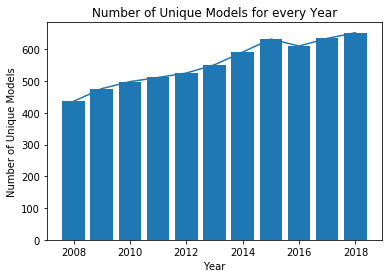

In [26]:
#Plot all unique model car counts in each year
plt.bar(years,uni_model)
plt.plot(years,uni_model)
plt.title("Number of Unique Models for every Year")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models")

OBSERVATIONS:
1. From the graph we could see that unique models are getting increased year after year except 2016.
2. In 2008, unique models count was 436 and in 2018 it is 652, So, In a span of 10 years unique model count has increased by 49.5%

Text(0, 0.5, 'Number of Unique Fuels')

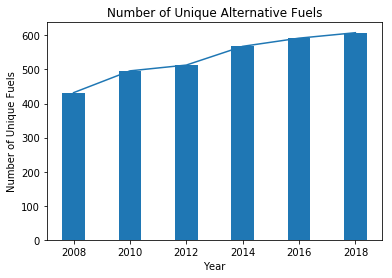

In [27]:
# SEGREGATION OF FUELS USED BY MAJORITY PEOPLE AND ALTERNATIVE FUEL USED BY FEW

fl2008 = epa2008.query('Fuel in ["Gasoline", "ethanol/gas"]').Model.nunique()
altfl2008 = epa2008.query('Fuel in ["CNG", "ethanol","diesel"]').Model.nunique()

fl2010 = epa2010.query('Fuel in ["Gasoline", "Ethanol/Gas","Diesel"]').Model.nunique()
altfl2010 = epa2010.query('Fuel in ["CNG", "Ethanol","Hydrogen"]').Model.nunique()

fl2012 = epa2012.query('Fuel in ["Gasoline", "Ethanol/Gas","Diesel"]').Model.nunique()
altfl2012 = epa2012.query('Fuel in ["CNG", "Electricity","CNG/Gasoline","Gasoline/Electricity"]').Model.nunique()

fl2014 = epa2014.query('Fuel in ["Gasoline", "Ethanol/Gas","Diesel"]').Model.nunique()
altfl2014 = epa2014.query('Fuel in ["CNG", "Electricity","Diesel","CNG/Gasoline","Gasoline/Electricity","Hydrogen"]').Model.nunique()

fl2016 = epa2016.query('Fuel in ["Gasoline", "Ethanol/Gas","Diesel","Electricity"]').Model.nunique()
altfl2016 = epa2016.query('Fuel in ["Gasoline/Electricity","Hydrogen"]').Model.nunique()

fl2018 = epa2016.query('Fuel in ["Gasoline", "Ethanol/Gas","Diesel","Electricity","Gasoline/Electricity"]').Model.nunique()
altfl2018 = epa2016.query('Fuel in ["Electricity","Hydrogen"]').Model.nunique()

plt.bar([2008,2010,2012,2014,2016,2018],[fl2008,fl2010,fl2012,fl2014,fl2016,fl2018])
plt.plot([2008,2010,2012,2014,2016,2018],[fl2008,fl2010,fl2012,fl2014,fl2016,fl2018])
plt.title("Number of Unique Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Fuels")

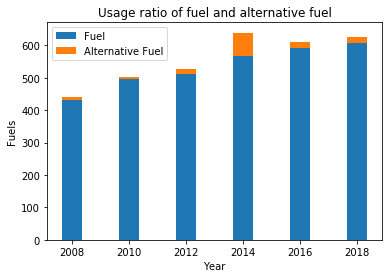

In [28]:
# Alternative fuel was categorized when its usage is more than 50 in all Vehicles
#From the plot, new alternative fuel was comparitively largely used during the year 2014
N = 6
fuel_plot = [fl2008,fl2010,fl2012,fl2014,fl2016,fl2018]
altfuel_plot = [altfl2008,altfl2010,altfl2012,altfl2014,altfl2016,altfl2018]
ind = np.arange(N) 
p1 = plt.bar(ind, fuel_plot, width = 0.35)
p2 = plt.bar(ind, altfuel_plot, width = 0.35,bottom=fuel_plot)
plt.xlabel('Year')
plt.ylabel('Fuels')
plt.title('Usage ratio of fuel and alternative fuel')
plt.xticks(ind, [2008,2010,2012,2014,2016,2018])
plt.yticks(np.arange(0, 700, 100))
plt.legend((p1[0], p2[0]), ('Fuel', 'Alternative Fuel'))
plt.show()

- HOW MUCH DID VEHICLE CLASSES IMPROVED IN FUEL ECONOMY(INCREASED IN MPG) PER YEAR


In [29]:
# GROUPING OF VEHICLE CLASS AND THEIR AVG VALUES
veh_class08 = epa2008.groupby("Veh_Class").Cmb_MPG.mean()
veh_class13 = epa2013.groupby("Veh_Class").Cmb_MPG.mean()
veh_class18 = epa2018.groupby("Veh_Class").Cmb_MPG.mean()
# COMPARING THE VARIATION OF VEHICLE CLASS FOR EVERY 2 YEARS
diff_veh_cla_1 = veh_class13 - veh_class08
diff_veh_cla_1.dropna(inplace=True)
diff_veh_cla_2 = veh_class18 - veh_class13
diff_veh_cla_2 = diff_veh_cla_2.drop(diff_veh_cla_2[diff_veh_cla_2 < 0].index)

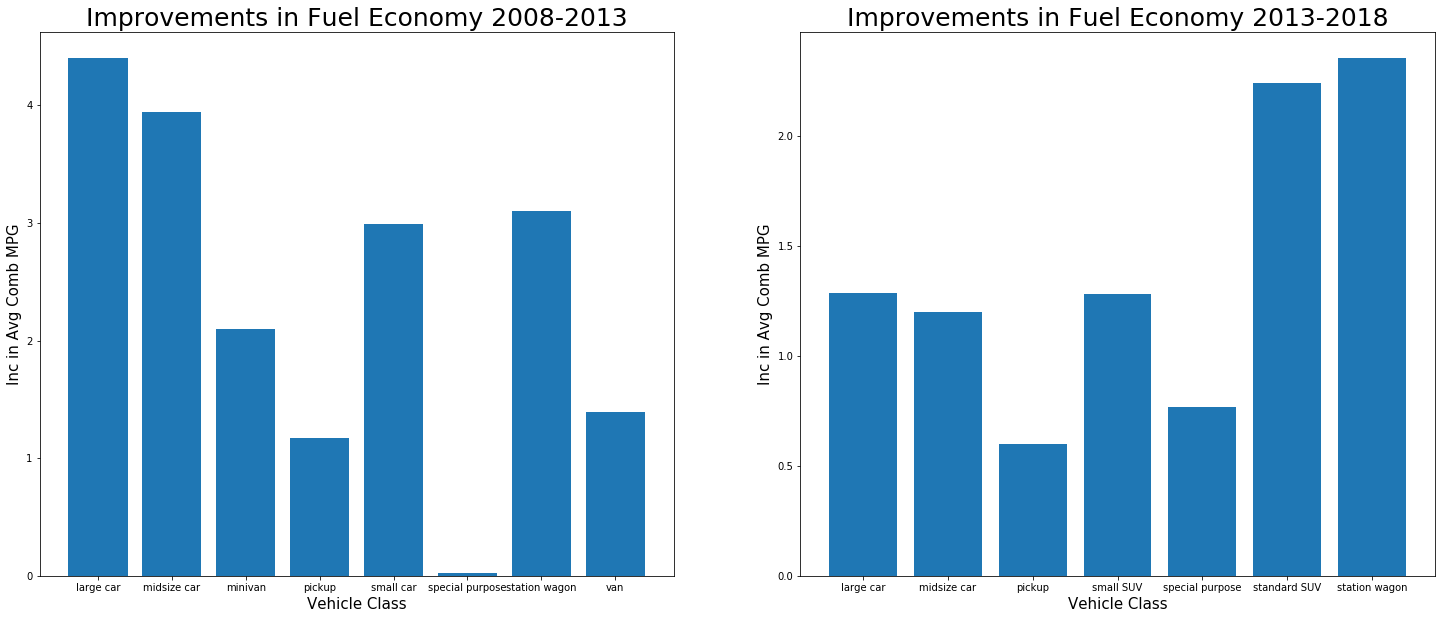

In [30]:
# THIS PLOT SHOWS THE TREND IN WHICH FUELS ECONOMY FOR VEHICLE CLASS VARY
plt.figure(figsize=(25, 10))
plt.title('Improvements in Fuel Economy by Vehicle Class')
#
plt.subplot(121)
plt.bar(diff_veh_cla_1.index, diff_veh_cla_1)
plt.title('Improvements in Fuel Economy 2008-2013',size =25)
plt.xlabel('Vehicle Class',size =15)
plt.ylabel('Inc in Avg Comb MPG',size =15);
plt.subplot(122)
plt.bar(diff_veh_cla_2.index, diff_veh_cla_2)
plt.title('Improvements in Fuel Economy 2013-2018',size =25)
plt.xlabel('Vehicle Class',size =15)
plt.ylabel('Inc in Avg Comb MPG',size =15);

From the graph, between 2008 to 2013  large car and mid size car had better fuel efficiency.
Between 2013 to 2018, Vehicle class like Station wagon and standard SUV has increased MPG.

- CHARACTERISTICS OF SMARTWAY VEHICLES,HAVE THEY CHANGED OVER TIME.(MPG,GREENHOUSE GAS)

In [31]:
print("Smart Way Vehicles Category in 2008 are ",epa2008["SmartWay"].unique())
print("Smart Way Vehicles Category in 2010 are ",epa2013["SmartWay"].unique())
print("Smart Way Vehicles Category in 2012 are ",epa2018["SmartWay"].unique())
sw08 = epa2008.query('SmartWay == "yes"')
sw13 = epa2013.query('SmartWay in ["yes","Elite"]')
sw18 = epa2018.query('SmartWay in ["yes","Elite"]')
print(len(sw08),len(sw13),len(sw18))

Smart Way Vehicles Category in 2008 are  ['no' 'yes']
Smart Way Vehicles Category in 2010 are  ['yes' 'no' 'Elite']
Smart Way Vehicles Category in 2012 are  ['no' 'Elite' 'yes']
638 526 417


The Characteristics of smart way vehicles have changed over time from 2 to 3 from 2008 to 2013 and remained same till 2018

EXPLORATORY DATA ANALYSIS

In [32]:
epaalg = epadf.copy()
print(epaalg.dtypes)
epaalg.head(2)

Year                      int64
Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Sales_Area                int64
Stnd                     object
Underhood_ID             object
Veh_Class                object
Air_Pollution_Score      object
City_MPG                 object
Hwy_MPG                  object
Cmb_MPG                   int64
Greenhouse_Gas_Score     object
SmartWay                 object
Comb_CO2                 object
dtype: object


,Year,Model,Displ,Cyl,Trans,Drive,Fuel,Sales_Area,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay,Comb_CO2
0,2008,ACURA MDX,3.7,6.0,Auto-S5,4WD,Gasoline,0,U2,8HNXT03.7PKR,SUV,7,15,20,17,4,no,NaN
1,2008,ACURA MDX,3.7,6.0,Auto-S5,4WD,Gasoline,1,B5,8HNXT03.7PKR,SUV,6,15,20,17,4,no,NaN


In [33]:
# Converting smart way vehicles category into categorical variable as yes-1 or no-0
epaalg['SmartWay'].replace({"no":0,"yes":1,"Elite":1}, inplace=True)

In [36]:
epaalg['Air_Pollution_Score']=epaalg['Air_Pollution_Score'].astype(str)

In [37]:
#Remove unnecessary "/" in values of Air_Pollution_Score like [4/4  --> 4]
epaalg['Air_Pollution_Score'].replace({"Mod":5}, inplace=True)
for i in range (0,len(epaalg["Air_Pollution_Score"])):
    if(len(epaalg["Air_Pollution_Score"][i]) >=3):
        epaalg["Air_Pollution_Score"][i] = epaalg["Air_Pollution_Score"][i][0]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [38]:
epaalg['Air_Pollution_Score']=epaalg['Air_Pollution_Score'].astype(int)

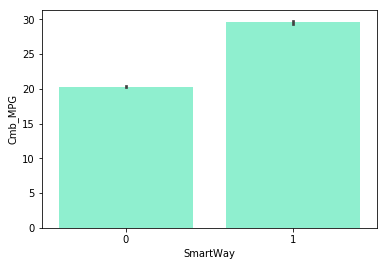

In [39]:
# Combined MPG has good proportionality to predict smartway vehicles
sns.barplot('SmartWay', 'Cmb_MPG', data=epaalg, color="aquamarine")
plt.show()

In [40]:
co2_null = epaalg.Comb_CO2.isnull().sum()
per_co2_null = (co2_null/len(epaalg.Comb_CO2))*100
print ("The Percent of null values in Comb_CO2 is ",per_co2_null)

The Percent of null values in Comb_CO2 is  45.58909730363423


In [41]:
proper_int_values = 0
tot_ggs_value = len(epaalg.Greenhouse_Gas_Score)
for i in range (0,tot_ggs_value):
    if isinstance(epaalg.Greenhouse_Gas_Score[i], int):
        proper_int_values +=1
per_ggs_int = (proper_int_values/tot_ggs_value)*100
print("Proper integer values in Greenhouse_Gas_Score is",per_ggs_int)    

Proper integer values in Greenhouse_Gas_Score is 19.42409144196952


LOGISTIC REGRESSION CLASSIFIER ALGORITHM TO PREDICT SMART WAY VEHICLE OR NOT

In [42]:
X = epaalg[['Cmb_MPG','Air_Pollution_Score']]
y = epaalg['SmartWay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred_logist = logreg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred_logist)
print(confusion_matrix)

[[6088  308]
 [ 553 1240]]


In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logist))
print("Precision:",metrics.precision_score(y_test, y_pred_logist))
print("Recall:",metrics.recall_score(y_test, y_pred_logist))

Accuracy: 0.8948589571376236
Precision: 0.8010335917312662
Recall: 0.6915783602900167


DECISION TREE CLASSIFIER ALGORITHM TO PREDICT SMART WAY VEHICLE OR NOT

In [45]:
X = epaalg[['Cmb_MPG','Air_Pollution_Score']]
y = epaalg['SmartWay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
y_pred_dtc = dtc.predict(X_test)

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc))
print("Precision:",metrics.precision_score(y_test, y_pred_dtc))
print("Recall:",metrics.recall_score(y_test, y_pred_dtc))

Accuracy: 0.9131762119916962
Precision: 0.8145348837209302
Recall: 0.781372002230898


CONCLUSION:

1. The Features selected for giving input to algorithm are Combined Mileage per gallon(which is a combination of City MPG and Highway MPG) and Air pollution Score to predict smart way vehicles.
2. Features like Comb_CO2, Greenhouse_Gas_Score, Fuel,Veh_Class, Stnd were Omitted. The reasons for omission are
    - Comb_CO2 had 45% null values
    - Greenhouse_Gas_Score had 19.4% proper integervalues
    - Fuel names are interlinked and not provided separately
    - Veh_Class contined alphabetic names
    - Stnd had alphanumeric names and had more varities, so we cannot apply encoders.
3. The Logistic regression classifier has accuracy of 89.49% out of 8189 test records.
4. The Decision Tree classifier has 91.31% accuracy out of 8189 test records.
5. So it becomes clear that Decision tree classifier is preferred over logistic regression for predicting SmartWay vehicles.
